# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 45.5 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


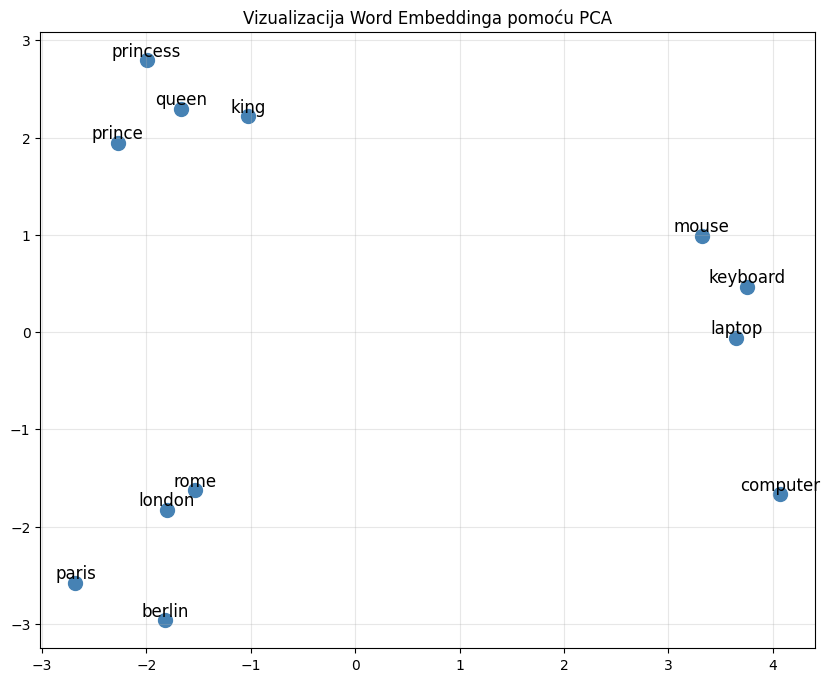

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


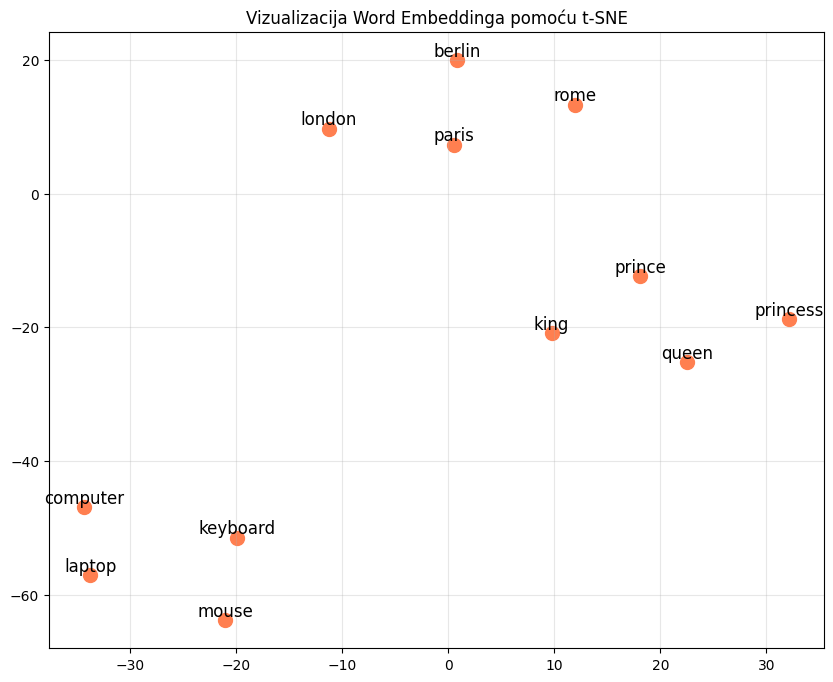

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [10]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [11]:
# Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [12]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [13]:
# Zadatak 2: Detekcija outliera

## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [14]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

In [15]:
# Zadatak 3: Vizualizacija tematskih klastera

## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [16]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [17]:
# Zadatak 4: Semantička sličnost rečenica

**RJEŠENJE:**



## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

In [25]:
# 1) 10 najsličnijih riječi za "doctor"
# 1) "doctor"
similar_doctor = model.most_similar("doctor", topn=10)
for w, s in similar_doctor:
    print(f"{w:>15}  {s:.4f}")


          nurse  0.7977
      physician  0.7965
        patient  0.7612
          child  0.7559
        teacher  0.7538
        surgeon  0.7479
   psychiatrist  0.7422
        doctors  0.7394
         father  0.7334
         mother  0.7284


In [27]:
# 2) 10 najsličnijih riječi za "technology"
# 2) "technology"

similar_tech = model.most_similar("technology", topn=10)
for w, s in similar_tech:
    print(f"{w:>15}  {s:.4f}")


   technologies  0.8928
       computer  0.8526
        systems  0.8289
       software  0.8090
      computing  0.7991
     innovation  0.7876
       business  0.7864
           tool  0.7848
      developed  0.7802
       research  0.7735


In [29]:
# 3) Vektorska aritmetika (analogije)

def analogy(pos, neg, topn=10):
    """
    pos: lista pozitivnih riječi
    neg: lista negativnih riječi
    """
    res = model.most_similar(positive=pos, negative=neg, topn=topn)
    print(f"\nAnalogy: ({' + '.join(pos)}) - ({' + '.join(neg)})")
    for w, s in res:
        print(f"{w:>15}  {s:.4f}")

# king - man + woman
analogy(pos=["king", "woman"], neg=["man"], topn=10)

# doctor - man + woman
analogy(pos=["doctor", "woman"], neg=["man"], topn=10)

# berlin - germany + france
analogy(pos=["berlin", "france"], neg=["germany"], topn=10)

# python - programming + cooking
analogy(pos=["python", "cooking"], neg=["programming"], topn=10)



Analogy: (king + woman) - (man)
          queen  0.8524
         throne  0.7664
         prince  0.7592
       daughter  0.7474
      elizabeth  0.7460
       princess  0.7425
        kingdom  0.7337
        monarch  0.7214
         eldest  0.7185
          widow  0.7099

Analogy: (doctor + woman) - (man)
          nurse  0.8405
          child  0.7663
       pregnant  0.7570
         mother  0.7517
        patient  0.7517
      physician  0.7507
        dentist  0.7360
      therapist  0.7343
        parents  0.7286
        surgeon  0.7165

Analogy: (berlin + france) - (germany)
          paris  0.9169
     prohertrib  0.7950
       brussels  0.7606
         french  0.7594
         vienna  0.7517
     strasbourg  0.7429
           rome  0.7149
      amsterdam  0.7019
         lisbon  0.6875
         geneva  0.6664

Analogy: (python + cooking) - (programming)
        roasted  0.6643
           goat  0.6612
        seaweed  0.6557
          beans  0.6493
      chestnuts  0.6485
       

* **“doctor”**: vraća riječi iz medicinskog konteksta (`nurse, physician, patient, surgeon...`). To nisu samo sinonimi nego i tematski bliske riječi (kontekst, ne rječnik).
* **“technology”**: dobro hvata IT/znanstveni kontekst (`computer, systems, software, computing, innovation...`), opet više “tema” nego sinonimi.

**Analogije**

* **king − man + woman → queen**: vrlo dobro. Odnos muško/žensko u istoj ulozi je čest i stabilan u korpusu, pa embedding to dobro kodira.
* **berlin − germany + france → paris**: odlično. Model prepoznaje obrazac **glavni grad ↔ država**. Ostali prijedlozi su europski gradovi (konzistentno), uz jedan šum token (`prohertrib`).
* **doctor − man + woman → nurse**: loše/djelomično. Umjesto “ženskog doktora” model sklizne u stereotipe iz podataka (**rodna pristranost**): `nurse`, pa i `pregnant/mother...`.
* **python − programming + cooking → roasted/beans/risotto...**: analogija nema smislen “par” i `python` je višeznačna riječ; model samo završi u kulinarskom semantičkom prostoru bez prave analogije.


## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





In [30]:
import numpy as np

def avg_sim_to_others(model, word, group):
    others = [w for w in group if w != word]
    sims = [model.similarity(word, w) for w in others]
    return float(np.mean(sims))

def find_outlier(model, group):
    scores = {w: avg_sim_to_others(model, w, group) for w in group}
    outlier = min(scores, key=scores.get)   # najmanja prosječna sličnost
    return outlier, scores[outlier], scores

def run_groups(model, groups):
    for i, g in enumerate(groups, 1):
        out, out_score, scores = find_outlier(model, g)
        print(f"\nGrupa {i}: {g}")
        print(f"Outlier: {out}")
        print(f"Prosj. sličnost outliera s ostalima: {out_score:.4f}")
        print("Sve prosječne sličnosti:")
        for w, s in sorted(scores.items(), key=lambda x: x[1]):
            print(f"  {w:>12} : {s:.4f}")

groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana'],
]

run_groups(model, groups)



Grupa 1: ['breakfast', 'lunch', 'dinner', 'cement']
Outlier: cement
Prosj. sličnost outliera s ostalima: 0.1079
Sve prosječne sličnosti:
        cement : 0.1079
        dinner : 0.6038
         lunch : 0.6091
     breakfast : 0.6311

Grupa 2: ['cat', 'dog', 'mouse', 'computer']
Outlier: computer
Prosj. sličnost outliera s ostalima: 0.4032
Sve prosječne sličnosti:
      computer : 0.4032
           dog : 0.6348
         mouse : 0.6491
           cat : 0.6825

Grupa 3: ['paris', 'london', 'berlin', 'table']
Outlier: table
Prosj. sličnost outliera s ostalima: 0.4166
Sve prosječne sličnosti:
         table : 0.4166
        berlin : 0.5761
        london : 0.6087
         paris : 0.6333

Grupa 4: ['happy', 'joyful', 'cheerful', 'angry']
Outlier: angry
Prosj. sličnost outliera s ostalima: 0.4812
Sve prosječne sličnosti:
         angry : 0.4812
        joyful : 0.5485
      cheerful : 0.5647
         happy : 0.5672

Grupa 5: ['python', 'java', 'javascript', 'banana']
Outlier: banana
Prosj. s

### Interpretacija rezultata (outlier + prosječna sličnost + zašto)

**Grupa 1: `['breakfast', 'lunch', 'dinner', 'cement']`**

* **Outlier:** `cement`
* **Prosj. sličnost:** **0.1079**
* **Zašto:** tri riječi su obroci (ista semantička domena “hrana/obrok”), a `cement` je građevinski materijal pa se pojavljuje u potpuno drugim kontekstima.

**Grupa 2: `['cat', 'dog', 'mouse', 'computer']`**

* **Outlier:** `computer`
* **Prosj. sličnost:** **0.4032**
* **Zašto:** `cat/dog/mouse` su životinje. `computer` je tehnologija.
  Napomena: vrijednost nije ekstremno niska jer “mouse” ima i tehnološko značenje (računalni miš), pa embedding povlači domenu “computer”.

**Grupa 3: `['paris', 'london', 'berlin', 'table']`**

* **Outlier:** `table`
* **Prosj. sličnost:** **0.4166**
* **Zašto:** prva tri su europski gradovi; `table` je objekt/namještaj.
  Relativno viša sličnost je očekivana jer `table` često ko-occur s temama putovanja/ugostiteljstva (“restaurant table”, “Paris restaurants”), pa model nađe slabe veze.

**Grupa 4: `['happy', 'joyful', 'cheerful', 'angry']`**

* **Outlier:** `angry`
* **Prosj. sličnost:** **0.4812**
* **Zašto:** `happy/joyful/cheerful` su pozitivne emocije, dok je `angry` negativna emocija.
  Ipak, sličnost nije preniska jer su sve riječi iz iste šire domene “emocije/raspoloženja”, pa dijele kontekste (npr. “feel ___”).

**Grupa 5: `['python', 'java', 'javascript', 'banana']`**

* **Outlier:** `banana`
* **Prosj. sličnost:** **0.1410**
* **Zašto:** tri riječi su programski jezici / programiranje, a `banana` je voće (druga domena).
  Zato je prosječna sličnost vrlo niska i outlier je jasno odvojen.


## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


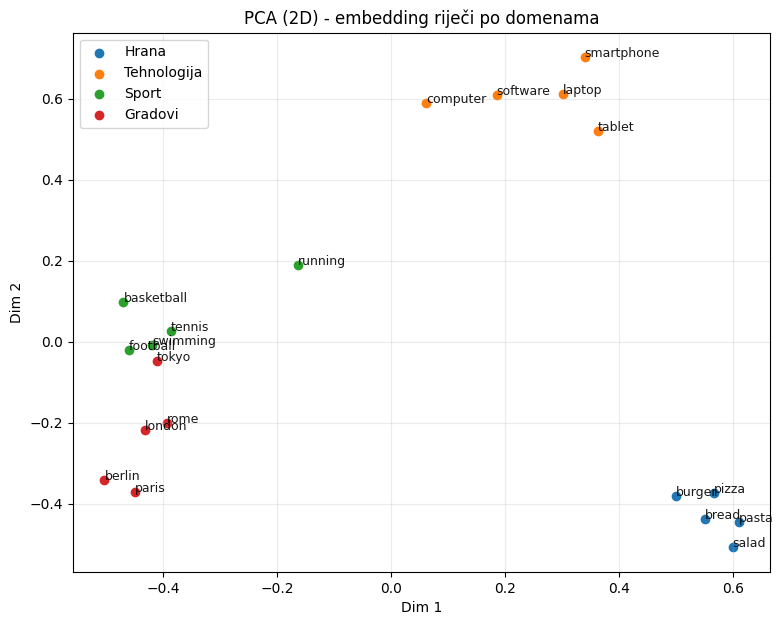

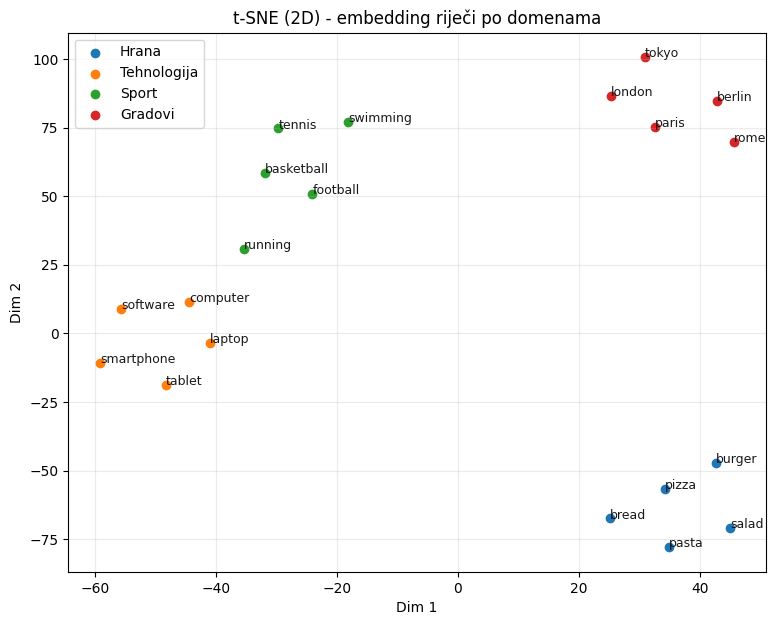

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

def collect_vectors(model, categories):
    words, labels, vecs = [], [], []
    missing = []
    for cat, ws in categories.items():
        for w in ws:
            if hasattr(model, "key_to_index"):
                in_vocab = w in model.key_to_index
            else:
                in_vocab = w in model  # fallback

            if in_vocab:
                v = model[w]
                # L2 normalizacija (često pomaže kod usporedbe)
                v = v / (np.linalg.norm(v) + 1e-12)
                words.append(w)
                labels.append(cat)
                vecs.append(v)
            else:
                missing.append((cat, w))
    return np.vstack(vecs), words, labels, missing

X, words, labels, missing = collect_vectors(model, categories)

if missing:
    print("Nedostaju riječi u vokabularu modela:")
    for cat, w in missing:
        print(f"  {cat}: {w}")

# --- 1) PCA u 2D ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# --- 2) t-SNE u 2D ---
# perplexity mora biti < broja uzoraka; ovdje je 20 riječi -> 5 je sigurno
tsne = TSNE(
    n_components=2,
    perplexity=5,
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_tsne = tsne.fit_transform(X)

def plot_2d(X_2d, title, words, labels):
    plt.figure(figsize=(9, 7))
    unique_labels = list(dict.fromkeys(labels))  # stabilan redoslijed

    for lab in unique_labels:
        idx = [i for i, L in enumerate(labels) if L == lab]
        plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=lab)  # boje po default ciklusu

        # oznake riječi
        for i in idx:
            plt.annotate(words[i], (X_2d[i, 0], X_2d[i, 1]), fontsize=9, alpha=0.9)

    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend()
    plt.grid(True, alpha=0.25)
    plt.show()

plot_2d(X_pca, "PCA (2D) - embedding riječi po domenama", words, labels)
plot_2d(X_tsne, "t-SNE (2D) - embedding riječi po domenama", words, labels)


#### PCA (2D)

* **Tehnologija** (narančasto) i **hrana** (plavo) su jasno odvojene, uglavnom po **Dim 1**: tehnologija je gore-desno, hrana dolje-desno.
* **Sport** (zeleno) i **gradovi** (crveno) su **blizu i djelomično se preklapaju** oko lijeve strane grafa. To znači da PCA u prve 2 komponente nije “našao” osi koje ih čisto razdvajaju, jer PCA gleda **globalnu varijancu** i “najveće razlike” u podacima.
* U sportu se vidi da je `running` malo odvojen od ostalih sportova (više prema gore), što može značiti da u korpusu ima širi kontekst (fitness, zdravlje, navike), dok su `football/basketball/tennis/swimming` češće “sportski” kontekst.

#### t-SNE (2D)

* t-SNE daje **4 vrlo jasna klastera**: hrana, tehnologija, sport, gradovi su gotovo potpuno odvojeni.
* Unutar klastera riječi koje su stvarno slične ostaju blizu (npr. tehnologija je kompaktna; gradovi su kompaktni).
* Ovo je očekivano jer t-SNE optimizira **lokalna susjedstva** (tko je kome najbliži u originalnom embedding prostoru), pa bolje “iscrta” tematske grupe.

### Ključna razlika PCA vs t-SNE

* **PCA**: linearno, čuva **globalnu** strukturu/varijancu; zato može doći do preklapanja domena (kao sport i gradovi kod tebe).
* **t-SNE**: nelinearno, čuva **lokalnu** strukturu; zato dobiješ jasne klastere, ali:

  * **udaljenosti između klastera nisu pouzdane** (npr. to što su gradovi “daleko” od hrane ne znači nužno “2× dalji” u originalnom prostoru),
  * rezultat ovisi o parametrima i random seed-u.

Ovo je tipičan ishod: **PCA daje grublju sliku** (više preklapanja), a **t-SNE naglasi klastere po domenama**.


## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



In [32]:
import re
import numpy as np

def tokenize(text):
    # jednostavna tokenizacija: mala slova, bez interpunkcije
    return re.findall(r"[a-z']+", text.lower())

def sentence_embedding(model, sentence):
    toks = tokenize(sentence)

    vecs = []
    for t in toks:
        # gensim KeyedVectors: key_to_index; fallback na "t in model"
        in_vocab = (t in model.key_to_index) if hasattr(model, "key_to_index") else (t in model)
        if in_vocab:
            vecs.append(model[t])

    if not vecs:
        return None  # sve OOV

    v = np.mean(np.vstack(vecs), axis=0)
    v = v / (np.linalg.norm(v) + 1e-12)  # normalizacija radi stabilnije kosinusne sličnosti
    return v

def sentence_similarity(model, s1, s2):
    v1 = sentence_embedding(model, s1)
    v2 = sentence_embedding(model, s2)
    if v1 is None or v2 is None:
        return np.nan
    return float(np.dot(v1, v2))  # kosinus jer su vektori normirani

sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

for i, (a, b) in enumerate(sentence_pairs, 1):
    sim = sentence_similarity(model, a, b)
    print(f"{i}. sim = {sim:.4f} | '{a}'  <->  '{b}'")


1. sim = 0.9524 | 'The cat sits on the mat.'  <->  'A cat is sitting on a rug.'
2. sim = 0.9664 | 'I love programming in Python.'  <->  'Python programming is my passion.'
3. sim = 0.8401 | 'The weather is nice today.'  <->  'I enjoy coding in Python.'
4. sim = 0.8881 | 'Machine learning is fascinating.'  <->  'Artificial intelligence is interesting.'
5. sim = 0.9632 | 'How do I reset my password?'  <->  'I forgot my password, how to recover it?'
6. sim = 0.9158 | 'The quick brown fox jumps.'  <->  'A fast auburn fox leaps.'


### Analiza dobivenih sličnosti (prosječni embedding)

**Model kao slične prepoznaje (očekivano):**

1. **Cat/mat vs cat/rug (0.9524)** – vrlo visoko, jer dijele ključne riječi i istu situaciju (“cat”, “sitting”).
2. **Python programming (0.9664)** – gotovo identično značenje, očekivano najviše.
3. **Reset/recover password (0.9632)** – ista namjera + iste ključne riječi (“password”, “reset/forgot/recover”).
4. **Fox jumps vs fox leaps (0.9158)** – sinonimi (“quick/fast”, “jumps/leaps”), ista scena.

**Djelomično očekivano, ali prenapuhano:**
4) **Machine learning vs AI (0.8881)** – semantički povezano, pa visoka sličnost ima smisla. Ipak, rečenice nisu ekvivalentne (ML je podskup AI), a prosjek riječi ne zna hijerarhiju pojmova.

**Jasno problematično:**
3) **Weather vs coding in Python (0.8401)** – ovo bi trebalo biti nisko (različite teme), ali ispalo je visoko. To je tipičan kvar prosječnog embeddinga.

### Zašto je (3) ispalo toliko visoko?

* Prosječni embedding daje “opći” vektor teme rečenice, ali u kratkim rečenicama često dominiraju **opće riječi** (`the`, `is`, `i`, `enjoy`, `today`) koje su u korpusu široko povezane i “vuku” vektor prema nekoj općenitoj, neutralnoj regiji prostora.
* Metoda ignorira strukturu i fokus rečenice; dovoljno je da rečenice dijele opći stil/gramatičke riječi da sličnost bude visoka.

### Ograničenja metode prosječnog embeddinga (koja se vide iz rezultata)

* **Ignorira redoslijed i sintaksu** → ne razlikuje “tko radi što kome”.
* **Slabo hvata značenje rečenice kao cjeline** → daje previsoke sličnosti i za nepovezane rečenice (par 3).
* **Jednaka težina svih riječi** → stopwordovi i opće riječi “razvodne” ključne pojmove.
* **Ne razumije negaciju i nijanse** (npr. “not good” često bude previše blisko “good”).
* **Nema kontekst** za višeznačne riječi (npr. “python” zmija vs jezik).

### Potencijalna Poboljšanja

* Ukloniti **stopwords** i interpunkciju; po mogućnosti **lemmatizacija**.
* Koristiti **ponderirano prosječenje**: TF-IDF ili SIF (rijeđe riječi veća težina).
* Umjesto Word2Vec/GloVe prosjeka koristiti **sentence embeddings** (npr. Sentence-BERT) koji su trenirani baš za sličnost rečenica i puno bolje rješavaju slučaj (3).
* Koristiti modele sa **subword** podrškom (npr. fastText) za bolju robusnost na rijetke/OOV riječi.
